# Import Libraries

In [1]:
import prince
import itertools
import numpy as np
import pandas as pd
import pathlib as pl
import seaborn as sns

# from prince import MCA
from scipy import stats
from subjetividades import *
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from matplotlib.patheffects import withStroke

In [2]:
current_path    = pl.Path.cwd().parent
output_folders  = create_output_directories(current_path)
data_folders    = create_data_directories(output_folders[0])
docs_list       = list(data_folders[0].glob('*.parquet'))
docs_list

[WindowsPath('d:/Repositorios/Vanessa - subjetividades/subjetividades-politicas/data/raw/cali.parquet')]

# Import the dataset

In [3]:
df = pd.read_parquet(docs_list[0])
df.head()

,ResponseId,LocationLatitude,LocationLongitude,Sex,Age,EDuc,Etnia,Q69,Q70,Identity Fusion_1,...,Q78_2,Q78_3,Q78_4,Deshum_1,Deshum_2,Deshum_3,Q63,Q64,Duration in minutes,minutes_per_question
88,R_1kLcWuTC7wCd3kf,3.4129,-76.5191,1,35,5,4,CALI,VALLE DEL CAUCA,2.0,...,7.0,5.0,7.0,71.0,94.0,48.0,1,2,56.133333,0.357537
253,R_3lS6rYyZtlfoUM0,3.4129,-76.5191,1,55,4,0,CALI,VALLE DEL CAUCA,5.0,...,7.0,7.0,7.0,18.0,18.0,15.0,3,3,25.533333,0.162633
255,R_2zoHnCAn6RAEMZ3,4.6913,-74.0320,1,34,5,3,CALI,VALLE DEL CAUCA,5.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2,5,12.700000,0.080892
256,R_1dKXNeYwm48UtUJ,3.4129,-76.5191,1,55,4,0,CALI,VALLE DEL CAUCA,5.0,...,7.0,7.0,7.0,17.0,19.0,24.0,3,3,37.633333,0.239703
261,R_3staFjzi5giVh5F,3.4129,-76.5191,1,46,4,0,CALI,VALLE DEL CAUCA,5.0,...,5.0,5.0,7.0,100.0,50.0,100.0,1,2,123.600000,0.787261


In [4]:
df.shape

(96, 107)

In [5]:
all_columns=df.columns.to_list()


In [6]:
lista_columns = ['Sex', 'Age', 'EDuc', 'Etnia', 'Identity Fusion_1', 'Identity Fusion_2', 'Identity Fusion_3', 'Identity Fusion_4', 'Identity Fusion_5', 'IdPol', 'IdF_1', 'IdF_3', 'IdF_4', 'IdF_5', 'CollUnc_1', 'CollUnc_3', 'CollUnc_4', 'SRW_1', 'SRW_3', 'Q74_1', 'Q74_2', 'Q74_3', 'Q71_3', 'Q75_3', 'InterGcontact_2', 'InterGcontact_4', 'InterGcontact_7', 'Salment_1', 'Salment_2', 'Salment_6', 'O-C-Test_1','O-C-T3_1', 'Q52_1', 'Q54_1', 'ActRadic_1', 'Q76_2', 'Q72_1', 'Q72_3', 'Q72_4', 'Q78_4', 'Deshum_1', 'Deshum_2', 'Deshum_3']
#create a subset of the data named df_subset with the columns in lista_columns
df = df[lista_columns]


df.head()

,Sex,Age,EDuc,Etnia,Identity Fusion_1,Identity Fusion_2,Identity Fusion_3,Identity Fusion_4,Identity Fusion_5,IdPol,...,Q54_1,ActRadic_1,Q76_2,Q72_1,Q72_3,Q72_4,Q78_4,Deshum_1,Deshum_2,Deshum_3
88,1,35,5,4,2.0,0.0,1.0,1,2.0,1,...,0,7.0,1.0,7.0,5.0,7.0,7.0,71.0,94.0,48.0
253,1,55,4,0,5.0,5.0,5.0,5,5.0,0,...,0,3.0,7.0,3.0,3.0,3.0,7.0,18.0,18.0,15.0
255,1,34,5,3,5.0,7.0,7.0,5,7.0,1,...,0,1.0,1.0,1.0,5.0,5.0,1.0,0.0,0.0,0.0
256,1,55,4,0,5.0,5.0,5.0,5,5.0,7,...,0,7.0,7.0,7.0,5.0,7.0,7.0,17.0,19.0,24.0
261,1,46,4,0,5.0,5.0,6.0,6,5.0,5,...,0,7.0,7.0,5.0,5.0,5.0,7.0,100.0,50.0,100.0


In [7]:
df.info

<bound method DataFrame.info of       Sex  Age  EDuc  Etnia  Identity Fusion_1  Identity Fusion_2  \
88      1   35     5      4                2.0                0.0   
253     1   55     4      0                5.0                5.0   
255     1   34     5      3                5.0                7.0   
256     1   55     4      0                5.0                5.0   
261     1   46     4      0                5.0                5.0   
...   ...  ...   ...    ...                ...                ...   
1175    1   44     0      3                3.0                5.0   
1178    1   49     5      3                6.0                5.0   
1179    0   39     0      3                4.0                4.0   
1180    1   49     5      1                5.0                5.0   
1186    1   45     4      3                5.0                5.0   

      Identity Fusion_3  Identity Fusion_4  Identity Fusion_5  IdPol  ...  \
88                  1.0                  1                2.0 

In [8]:
df.dtypes

Sex                    int32
Age                    int64
EDuc                   int32
Etnia                  int32
Identity Fusion_1    float64
Identity Fusion_2    float64
Identity Fusion_3    float64
Identity Fusion_4      int64
Identity Fusion_5    float64
IdPol                  int32
IdF_1                float64
IdF_3                float64
IdF_4                float64
IdF_5                float64
CollUnc_1            float64
CollUnc_3            float64
CollUnc_4            float64
SRW_1                float64
SRW_3                float64
Q74_1                float64
Q74_2                float64
Q74_3                float64
Q71_3                float64
Q75_3                float64
InterGcontact_2      float64
InterGcontact_4        int64
InterGcontact_7        int64
Salment_1              int64
Salment_2            float64
Salment_6            float64
O-C-Test_1             int64
O-C-T3_1             float64
Q52_1                  int64
Q54_1                  int64
ActRadic_1    

In [9]:
all_features = [
    'ResponseId', 'Sex', 'EDuc', 'Etnia', 'Identity Fusion_1', 'Identity Fusion_2',
    'Identity Fusion_3', 'Identity Fusion_4', 'Identity Fusion_5',
    'Identity Fusion_6', 'Identity Fusion_7', 'IdPol', 'IdF_1', 'IdF_2',
    'IdF_3', 'IdF_4', 'IdF_5', 'IdF_6', 'IdF_7', 'OriPol_1', 'IdPolUribe_1',
    'IdPolUribe_2', 'IdPolUribe_3', 'IdPolUribe_4', 'IdPolUribe_5',
    'IdPolUribe_6', 'IdPolUribe_7', 'IdPolUribe_8', 'CollUnc_1',
    'CollUnc_2', 'CollUnc_3', 'CollUnc_4', 'SRW_1', 'SRW_2', 'SRW_3',
    'Q74_1', 'Q74_2', 'Q74_3', 'Q71_1', 'Q71_2', 'Q71_3', 'Q75_1', 'Q75_2',
    'Q75_3', 'Q73_1', 'Q73_2', 'InterGcontact_1', 'InterGcontact_2',
    'InterGcontact_3', 'InterGcontact_4', 'InterGcontact_5',
    'InterGcontact_6', 'InterGcontact_7', 'Salment_1', 'Salment_2',
    'Salment_3', 'Salment_4', 'Salment_5', 'Salment_6', 'Salment_7',
    'SatVida_1', 'SatVida_2', 'SatVida_3', 'SatVida_4', 'SatVida_5',
    'O-C-Test_1', 'O-C-Test2_1', 'O-C-T3_1', 'O-C-T4_1', 'O-C-T5_1',
    'Q52_1', 'Q53_1', 'Q54_1', 'Q55_1', 'Q56_1', 'ActRadic_1', 'ActRadic_2',
    'ActRadic_3', 'Q76_1', 'Q76_2', 'Q76_3', 'Q72_1', 'Q72_2', 'Q72_3',
    'Q72_4', 'Q78_1', 'Q78_2', 'Q78_3', 'Q78_4', 'Q63', 'Q64']

# I want to remove the elements of the list of all_features that are not in the list lista_columns
all_features = [x for x in all_features if x in lista_columns]

print(len(all_features))
print(len(lista_columns))

all_features

39
43


['Sex',
 'EDuc',
 'Etnia',
 'Identity Fusion_1',
 'Identity Fusion_2',
 'Identity Fusion_3',
 'Identity Fusion_4',
 'Identity Fusion_5',
 'IdPol',
 'IdF_1',
 'IdF_3',
 'IdF_4',
 'IdF_5',
 'CollUnc_1',
 'CollUnc_3',
 'CollUnc_4',
 'SRW_1',
 'SRW_3',
 'Q74_1',
 'Q74_2',
 'Q74_3',
 'Q71_3',
 'Q75_3',
 'InterGcontact_2',
 'InterGcontact_4',
 'InterGcontact_7',
 'Salment_1',
 'Salment_2',
 'Salment_6',
 'O-C-Test_1',
 'O-C-T3_1',
 'Q52_1',
 'Q54_1',
 'ActRadic_1',
 'Q76_2',
 'Q72_1',
 'Q72_3',
 'Q72_4',
 'Q78_4']

In [10]:
# categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = all_features
df[categorical_features] = df[categorical_features].astype('object')

print(f'Number of categorial features: {len(categorical_features)}')
print(f'Number of numerical features: {df.shape[1] - len(categorical_features)}')

Number of categorial features: 39
Number of numerical features: 4


In [11]:
total_features = df.columns.to_list()
total_features
print(f'Total number of features: {len(total_features)}')


numerical_features = [feature for feature in total_features if feature not in categorical_features]
df[numerical_features] = df[numerical_features].astype('int')

numerical_features

Total number of features: 43


['Age', 'Deshum_1', 'Deshum_2', 'Deshum_3']

# Descriptive analysis for Numerical features

In [12]:
descriptive_stats = df[numerical_features].describe().round(3)
descriptive_stats
descriptive_stats.to_excel(data_folders[1].joinpath('descriptive_stats.xlsx'))

# Normality test for Numerical features

In [13]:
# Test de Shapiro-Wilk para evaluar la normalidad
normality_results = {}
df2 = pd.DataFrame(columns=['Feature', 'Result', 'p-value'])
rows2 = []

for feature in numerical_features:
    stat, p_value = shapiro(df[feature].dropna())  # Eliminar NaNs para el test
    # normality_results[feature] = {'Statistic': stat, 'p-value': p_value}
    normality_results[feature] = {'Statistic': round(stat, 4), 'p-value': round(p_value, 4)}
    rows2.append({'Feature':feature, 'Result':stat, 'p-value': p_value})

df2 = pd.concat([df2, pd.DataFrame(rows2)], ignore_index=True)
df2.to_excel(data_folders[1].joinpath('shapiro_results.xlsx'))

# Mostrar los resultados
for feature, result in normality_results.items():
    print(f"{feature} - Shapiro-Wilk Test: Statistic={result['Statistic']}, p-value={result['p-value']}")


Age - Shapiro-Wilk Test: Statistic=0.9691, p-value=0.023
Deshum_1 - Shapiro-Wilk Test: Statistic=0.8184, p-value=0.0
Deshum_2 - Shapiro-Wilk Test: Statistic=0.8442, p-value=0.0
Deshum_3 - Shapiro-Wilk Test: Statistic=0.8479, p-value=0.0


C:\Users\hamso\AppData\Local\Temp\ipykernel_9728\1490278103.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = pd.concat([df2, pd.DataFrame(rows2)], ignore_index=True)


# Correlations between Numerical features

In [14]:
def stars(p):
    """
    Returns a string of asterisks (*) based on the significance level (alpha value) of a statistical test.

    Args:
        p (float): the p-value of the statistical test

    Returns:
        A string of asterisks indicating the significance level, as follows:
        - five asterisks (*****): alpha value is 0.0001 or 0.01% with 99.99% confidence
        - four asterisks (****): alpha value is 0.001 or 0.1% with 99.9% confidence
        - three asterisks (***): alpha value is 0.01 or 1% with 99% confidence
        - two asterisks (**): alpha value is 0.05 or 5% with 95% confidence
        - one asterisk (*): alpha value is 0.1 or 10% with 90% confidence
        - empty string (''): alpha value is greater than or equal to 0.1
    """
    if p < 0.0001:
        return '*****'
    elif p < 0.001:
        return '****'
    elif p < 0.01:
        return '***'
    elif p < 0.05:
        return '**'
    elif p < 0.1:
        return '*'
    else:
        return ''

In [15]:
def plot_correlations(dataframe, corr_methods):
    for method in corr_methods:
        stroke = withStroke(linewidth=2, foreground='black')
        corr_matrix = dataframe.corr(method=method)
        pval_matrix = dataframe.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

        # Create a mask to show only the lower triangle of the matrix
        mask = np.triu(np.ones_like(corr_matrix))
        mask2 = np.tril(np.ones_like(corr_matrix))
        stars_corr = pval_matrix * mask2 + mask
        pval_stars = stars_corr.applymap(stars)
        color_palette = sns.color_palette("Blues")
        with sns.axes_style("whitegrid"):
            f, ax = plt.subplots(figsize=(12, 10))
            ax = sns.heatmap(corr_matrix.round(4),
                             mask=mask,
                             vmax=1,
                             center=0,
                             vmin=-1,
                             square=True,
                             cmap=sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True),
                             linewidths=.5,
                             annot=True,
                             annot_kws={"size": 12},
                             fmt='.2f')
            ax.set_title(f'{method.capitalize()} Correlations Matrix', fontsize=20)
            plt.xticks(fontsize=9)
            plt.yticks(fontsize=9)
            
            for i, j in itertools.product(range(corr_matrix.shape[0]), range(corr_matrix.shape[0])):
                ax.text(j + 0.5, i + 0.8, pval_stars.iloc[i, j], ha='center', va='center', color='white', fontsize=18,path_effects=[stroke])

            plt.savefig(output_folders[1].joinpath(f'correlation_vi_{method.capitalize()}_triangular_stage.png'), dpi=300, bbox_inches='tight')
            plt.savefig(output_folders[1].joinpath(f'correlation_vi_{method.capitalize()}_triangular_stage.eps'), dpi=300, format='eps', bbox_inches='tight')
            plt.show()

C:\Users\hamso\AppData\Local\Temp\ipykernel_9728\162625470.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pval_stars = stars_corr.applymap(stars)


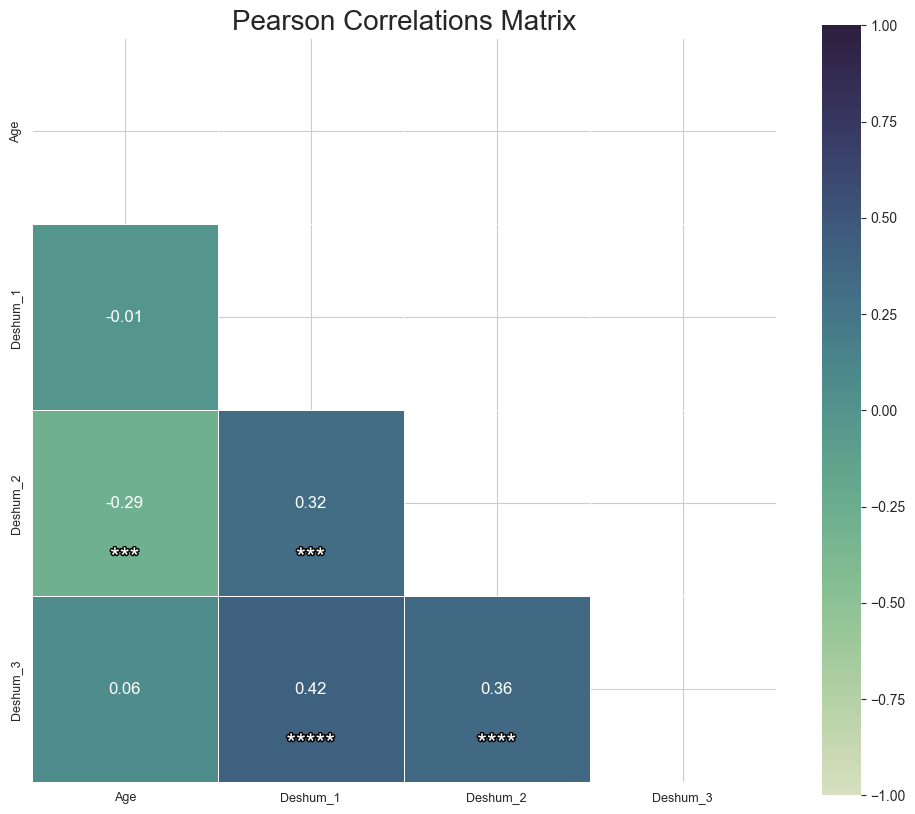

C:\Users\hamso\AppData\Local\Temp\ipykernel_9728\162625470.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pval_stars = stars_corr.applymap(stars)


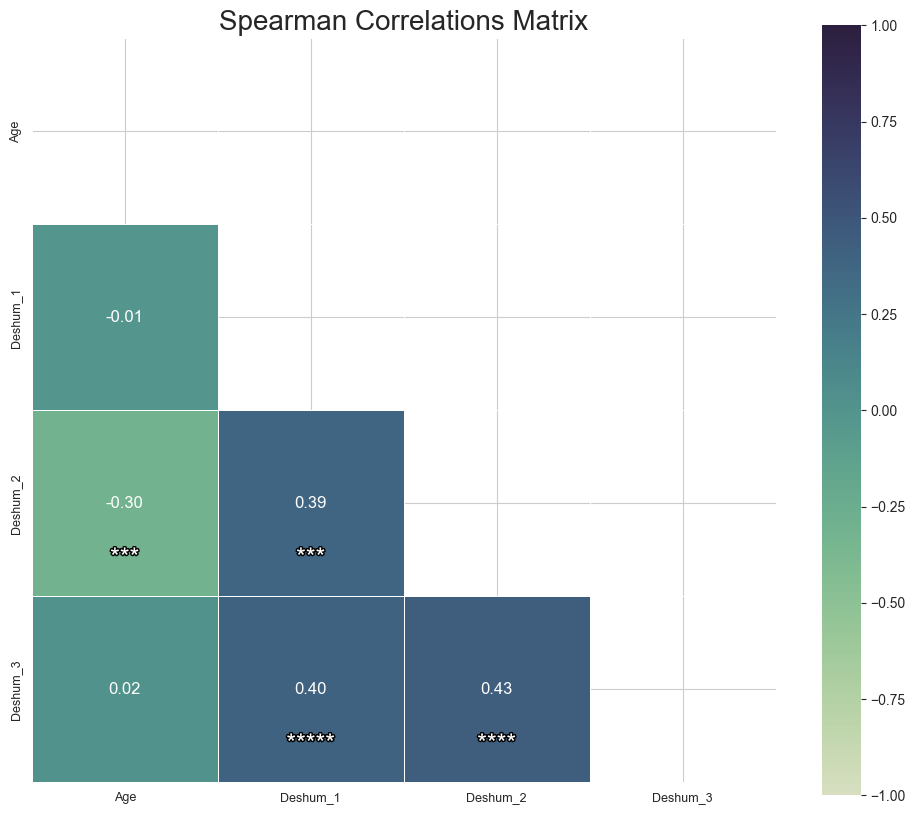

C:\Users\hamso\AppData\Local\Temp\ipykernel_9728\162625470.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pval_stars = stars_corr.applymap(stars)


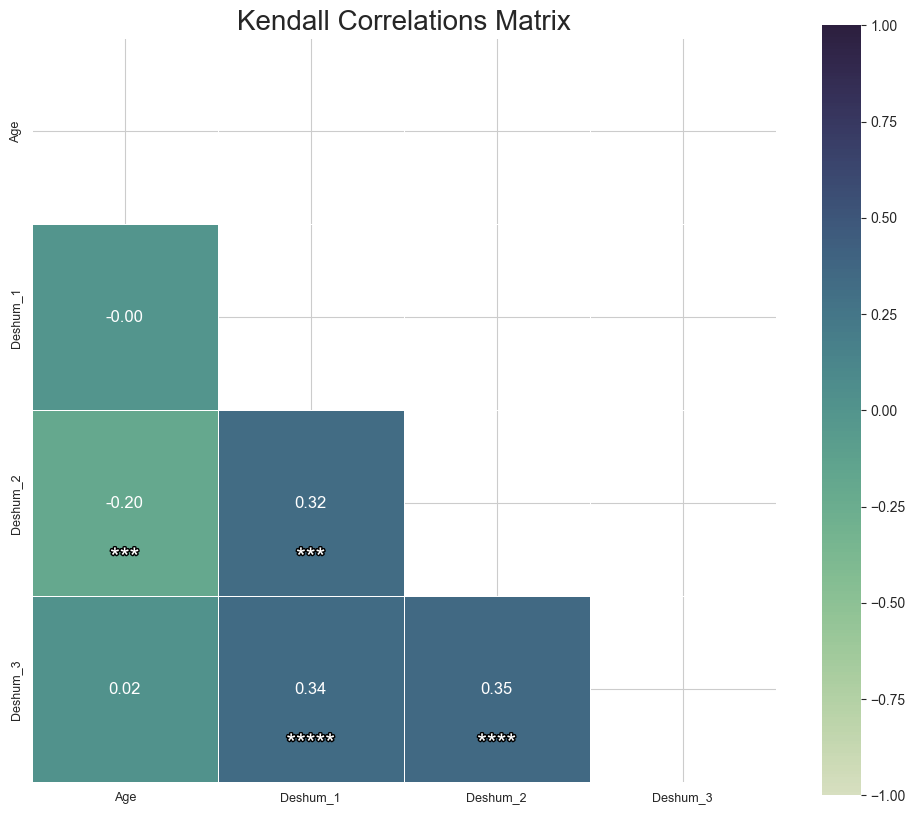

In [16]:
correlation_methods = ['pearson','spearman','kendall']
plot_correlations(df[numerical_features],correlation_methods)

In [17]:
for feature in categorical_features[1:]:
    print(f"Distribución de {feature}:")
    print(df[feature].value_counts(normalize=True))  # Proporciones
    print("\n")
    df[feature].value_counts(normalize=True).to_excel(data_folders[1].joinpath('distributions',f'{feature}_distribution.xlsx'))

Distribución de EDuc:
EDuc
5    0.354167
4    0.260417
0    0.229167
3    0.125000
2    0.010417
1    0.010417
6    0.010417
Name: proportion, dtype: float64


Distribución de Etnia:
Etnia
3    0.343750
4    0.270833
1    0.250000
0    0.093750
2    0.020833
5    0.020833
Name: proportion, dtype: float64


Distribución de Identity Fusion_1:
Identity Fusion_1
5.0    0.427083
6.0    0.156250
2.0    0.114583
4.0    0.093750
3.0    0.072917
0.0    0.062500
1.0    0.062500
7.0    0.010417
Name: proportion, dtype: float64


Distribución de Identity Fusion_2:
Identity Fusion_2
5.0    0.531250
6.0    0.270833
4.0    0.062500
7.0    0.052083
0.0    0.031250
2.0    0.031250
3.0    0.020833
Name: proportion, dtype: float64


Distribución de Identity Fusion_3:
Identity Fusion_3
5.0    0.531250
6.0    0.281250
4.0    0.072917
1.0    0.031250
7.0    0.031250
3.0    0.031250
0.0    0.010417
2.0    0.010417
Name: proportion, dtype: float64


Distribución de Identity Fusion_4:
Identity Fusion_4
5    0.

In [18]:
from scipy.stats import chi2_contingency

tab = pd.crosstab(df['Sex'], df['Etnia'])
print("Tabla de contingencia entre 'Sex' y 'Etnia':")
print(tab)


Tabla de contingencia entre 'Sex' y 'Etnia':
Etnia  0   1  2   3   4  5
Sex                       
0      2  13  1  12   9  1
1      6   9  1  21  17  1
2      0   1  0   0   0  0
3      1   1  0   0   0  0


In [19]:
categorical_features[1:]

['EDuc',
 'Etnia',
 'Identity Fusion_1',
 'Identity Fusion_2',
 'Identity Fusion_3',
 'Identity Fusion_4',
 'Identity Fusion_5',
 'IdPol',
 'IdF_1',
 'IdF_3',
 'IdF_4',
 'IdF_5',
 'CollUnc_1',
 'CollUnc_3',
 'CollUnc_4',
 'SRW_1',
 'SRW_3',
 'Q74_1',
 'Q74_2',
 'Q74_3',
 'Q71_3',
 'Q75_3',
 'InterGcontact_2',
 'InterGcontact_4',
 'InterGcontact_7',
 'Salment_1',
 'Salment_2',
 'Salment_6',
 'O-C-Test_1',
 'O-C-T3_1',
 'Q52_1',
 'Q54_1',
 'ActRadic_1',
 'Q76_2',
 'Q72_1',
 'Q72_3',
 'Q72_4',
 'Q78_4']

In [20]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html #scipy.stats.chi2_contingency
pairs = list(itertools.combinations(categorical_features[1:], 2))
df1 = pd.DataFrame(columns=['Feature', 'Chi2', 'p-value'])
rows = []

for pair in pairs:
    tab = pd.crosstab(df[pair[0]], df[pair[1]])
    chi2, p, dof, expected = chi2_contingency(tab)
    tab.to_excel(data_folders[1].joinpath('contingency_tables',f'{pair[0]}_{pair[1]}_contingency_table.xlsx'))
    rows.append({'Feature': f'{pair[0]} - {pair[1]}', 'Chi2': chi2, 'p-value': p})
    # print(tab)
df1 = pd.concat([df1, pd.DataFrame(rows)], ignore_index=True)

df1.to_excel(data_folders[1].joinpath('chi2_contingency.xlsx'))


C:\Users\hamso\AppData\Local\Temp\ipykernel_9728\618128936.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1 = pd.concat([df1, pd.DataFrame(rows)], ignore_index=True)


# Análisis de correspondencia múltiple

In [21]:
# https://maxhalford.github.io/prince/ca/

# https://maxhalford.github.io/prince/mca/

X = df[categorical_features[1:]]

# Realizar el análisis de correspondencia múltiple
mca = prince.MCA(
    n_components=2,  # Número de componentes principales a extraer
    n_iter=3,  # Número de iteraciones de la alternancia de mínimos cuadrados
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42  # Semilla para reproducibilidad
)

# Ajustar el MCA al conjunto de datos
mca = mca.fit(X)

# Obtener las coordenadas de las filas (observaciones) y columnas (categorías)
row_coords = mca.row_coordinates(X)
col_coords = mca.column_coordinates(X)

# Obtener los valores propios
eigenvalues = mca.eigenvalues_

# Calcular la inercia explicada por cada componente principal
explained_inertia_row = mca.row_contributions_.head().style.format('{:.0%}')
explained_inertia_col = mca.column_contributions_.head().style.format('{:.0%}')

mca.plot(
    X,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)



alt.LayerChart(...)

In [22]:
pedro=mca.column_contributions_
pedro['SUM'] = (pedro[0] + pedro[1])*100
pedro = pedro.sort_values(by='SUM', ascending=False)
pedro.head()

,0,1,SUM
Q78_4_3.0,0.035201,0.017791,5.299141
Identity Fusion_3_1.0,0.006353,0.041969,4.832233
Identity Fusion_3_3.0,0.029709,0.018102,4.781080
Identity Fusion_2_7.0,0.024955,0.018213,4.316839
Salment_2_7.0,0.007014,0.035620,4.263400


In [23]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD

# Suponemos que 'df' es tu DataFrame y 'categorical_features' es una lista de nombres de columnas categóricas
X = df[categorical_features[1:]].values

# Codificación one-hot de las variables categóricas
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

# Cálculo de las masas
masas = np.sum(X_encoded, axis=0) / np.sum(X_encoded)

# Cálculo de las matrices de Burt
Q = np.dot(X_encoded.T, X_encoded)
Q_masas = Q / np.sum(Q)

# Cálculo de los valores singulares y vectores singulares
U, D_cuadrado, V = np.linalg.svd(Q_masas - np.outer(masas, masas))

# Número de componentes principales a extraer
n_components = 2

# Cálculo de las coordenadas de fila y columna
row_coords = U[:, :n_components] * np.sqrt(D_cuadrado[:n_components])
col_coords = V[:n_components, :].T * np.sqrt(D_cuadrado[:n_components])

# Obtener los valores propios
eigenvalues = D_cuadrado[:n_components]

# Calcular la inercia explicada por cada componente principal
explained_inertia_row = (row_coords ** 2).sum(axis=1) / eigenvalues.sum()
explained_inertia_col = (col_coords ** 2).sum(axis=1) / eigenvalues.sum()

# Imprimir resultados
print("Coordenadas de fila:")
print(row_coords)
print("\nCoordenadas de columna:")
print(col_coords)
print("\nValores propios:")
print(eigenvalues)
print("\nInercia explicada por fila:")
print(explained_inertia_row)
print("\nInercia explicada por columna:")
print(explained_inertia_col)

Coordenadas de fila:
[[ 3.57769962e-04 -1.37417702e-03]
 [-5.26668878e-04  1.08971983e-04]
 [ 5.61544186e-04  2.33068584e-05]
 [-2.34044791e-04  4.50804303e-04]
 [-2.70944216e-04 -6.57749313e-04]
 [-1.17061012e-04  1.44918545e-03]
 [ 2.29404749e-04 -3.42254615e-07]
 [ 4.38918724e-04  4.94130333e-04]
 [ 1.15226039e-03 -1.98167039e-04]
 [-2.79848489e-04 -6.47000479e-04]
 [-2.26900025e-03  3.93653824e-03]
 [ 7.08328906e-04 -3.56720763e-03]
 [ 2.49340721e-04 -1.82934226e-05]
 [ 1.05007992e-03 -1.58173289e-04]
 [-4.89326842e-04  8.37929435e-04]
 [-6.16761173e-04 -3.15100495e-05]
 [ 1.99599762e-04 -3.94722738e-04]
 [-1.49565603e-03  2.47913024e-04]
 [ 2.56091082e-03  3.81102763e-03]
 [-1.34917604e-03 -4.26228302e-03]
 [ 1.40329582e-04 -5.01809919e-05]
 [-5.29624173e-04  3.93325850e-04]
 [-2.88360352e-04  1.17630101e-04]
 [-4.34174447e-04 -6.26889027e-05]
 [-1.04548968e-03 -1.14377422e-03]
 [-2.86581022e-04  6.64683181e-03]
 [ 7.95350217e-04 -5.79467054e-03]
 [ 1.78887946e-03 -1.56654104e-04]

In [24]:
import plotly.express as px

# Crear un DataFrame con las coordenadas de fila y columna
coords_df = pd.DataFrame({
    'fila': range(row_coords.shape[0]),
    'columna': range(col_coords.shape[0]),
    'x_fila': row_coords[:, 0],
    'y_fila': row_coords[:, 1],
    'x_columna': col_coords[:, 0],
    'y_columna': col_coords[:, 1]
})

# Graficar las coordenadas de fila
fig = px.scatter(coords_df, x='x_fila', y='y_fila', text='fila', title='Coordenadas de fila')
fig.show()

# Graficar las coordenadas de columna
fig = px.scatter(coords_df, x='x_columna', y='y_columna', text='columna', title='Coordenadas de columna')
fig.show()